In [115]:
from langchain_core.output_parsers import PydanticOutputParser
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv

from schema import Table
from prompt import prompt_image
from utils import convert_img_in_base64

load_dotenv()

model = ChatOpenAI(model="gpt-4o-mini", model_kwargs={"response_format": {"type": "json_object"}})

In [116]:
prompt = prompt_image()

In [118]:
parser = PydanticOutputParser(pydantic_object=Table)
prompt = prompt.partial(format_instructions=parser.get_format_instructions())

In [119]:
chain = prompt | model | parser

In [127]:
image_path = '../data/imgs/tabela5.bmp'
image_data = convert_img_in_base64(image_path)

response = chain.invoke({"image_data": image_data})

{'titulo': 'Formato com Notas sobre Cobertura em Observações',
 'cenario': ['Atual',
  'Não ponderado',
  'Ponderado',
  'Inverno',
  'Outono',
  'Primavera',
  'Verão'],
 'cobertura': [44, 91, 88, 79, 78, 79, 80],
 'percentual_cobertura': [None, 55.2, None, 47.9, 47.3, 47.9, 48.5]}

None


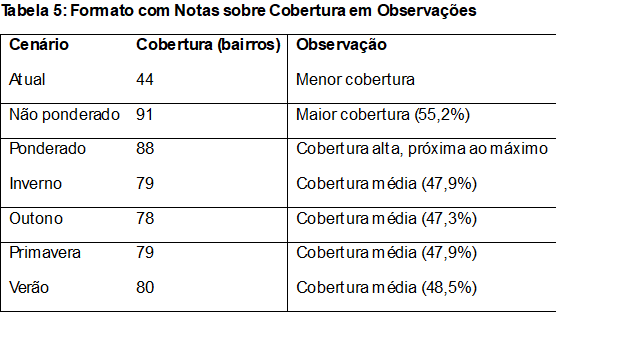

In [ ]:
from IPython import display
from base64 import b64decode

print(display.display(response.dict()))
display.Image(b64decode(image_data))